# Final Project

This notebook is my final project for the data visualization course.  I will apply different visualization techniques to a dataset to practice what we learned in lecture

### Exploratory Data Analysis

I want to practice visualization techniques by looking at life expectancy based on country, region of world, level of corruption, as well as correlation between life expectancy and corruption. 

For the life expectancy data, I acquired it from the World Bank at the following link: <https://data.worldbank.org/indicator/SP.DYN.LE00.IN>

And for corruption, I acquired the data from Transparency.org:  <https://www.transparency.org/en/cpi/2020>

Note that the corruption level is given on a scale of 0 to 100, where 0 is highly corrupt and 100 is very clean.

I uploaded these to my github page to allow for direct download from the internet.

In [273]:
import pandas as pd
import altair as alt
import numpy as np

In [274]:
LE_data_url = "https://raw.githubusercontent.com/dayivy/Visualization-Final/main/Life%20Expectancy%20Data.csv"
LE_data = pd.read_csv(LE_data_url)

META_data_url = "https://raw.githubusercontent.com/dayivy/Visualization-Final/main/Metadata-Country.csv"
META_data = pd.read_csv(META_data_url)

CPI_data_url = "https://raw.githubusercontent.com/dayivy/Visualization-Final/main/CPI2020_GlobalTablesTS_210125.csv"
CPI_data = pd.read_csv(CPI_data_url)

In [275]:
LE_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.465000,75.531000,75.636000,75.601000,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,59.293271,60.050780,60.709863,61.337911,61.856452,62.444045,62.922385,63.365858,63.755674,63.313856
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,...,61.419000,61.923000,62.417000,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,...,55.013138,55.340561,55.673406,55.922229,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,...,57.596000,58.623000,59.307000,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000


In [276]:
META_data.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [277]:
CPI_data.head()

,Country,ISO3,Region,CPI score 2020,Rank,Standard error,Number of sources,Lower CI,Upper CI,African Development Bank CPIA,...,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit,Global Insight Country Risk Ratings,IMD World Competitiveness Yearbook,PERC Asia Risk Guide,PRS International Country Risk Guide,Varieties of Democracy Project,World Bank CPIA,World Economic Forum EOS,World Justice Project Rule of Law Index
0,Denmark,DNK,WE/EU,88,1,1.78,8,85.09,90.91,NaN,...,90.0,NaN,83,94.0,NaN,98.0,78.0,NaN,79.0,86.0
1,New Zealand,NZL,AP,88,1,1.48,8,85.57,90.43,NaN,...,90.0,NaN,83,92.0,NaN,93.0,77.0,NaN,89.0,82.0
2,Finland,FIN,WE/EU,85,3,1.75,8,82.13,87.87,NaN,...,72.0,NaN,83,91.0,NaN,93.0,77.0,NaN,93.0,86.0
3,Singapore,SGP,AP,85,3,1.20,9,83.03,86.97,NaN,...,90.0,NaN,83,91.0,90.0,85.0,77.0,NaN,89.0,85.0
4,Sweden,SWE,WE/EU,85,3,1.30,8,82.86,87.14,NaN,...,90.0,NaN,83,84.0,NaN,93.0,77.0,NaN,77.0,87.0


In [278]:
sorted_CPI_data = CPI_data.sort_values(by=['Country'], ascending=True).reset_index(drop=True)

In [279]:
sorted_CPI_data.head()

,Country,ISO3,Region,CPI score 2020,Rank,Standard error,Number of sources,Lower CI,Upper CI,African Development Bank CPIA,...,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit,Global Insight Country Risk Ratings,IMD World Competitiveness Yearbook,PERC Asia Risk Guide,PRS International Country Risk Guide,Varieties of Democracy Project,World Bank CPIA,World Economic Forum EOS,World Justice Project Rule of Law Index
0,Afghanistan,AFG,AP,19,165,2.44,5,15.00,23.00,NaN,...,NaN,NaN,10,NaN,NaN,NaN,26.0,18.0,NaN,15.0
1,Albania,ALB,ECA,36,104,0.92,8,34.50,37.50,NaN,...,37.0,42.0,35,NaN,NaN,41.0,32.0,NaN,37.0,30.0
2,Algeria,DZA,MENA,36,104,1.48,7,33.57,38.43,NaN,...,37.0,NaN,35,NaN,NaN,32.0,28.0,NaN,46.0,37.0
3,Angola,AGO,SSA,27,142,2.01,7,23.70,30.30,NaN,...,20.0,NaN,22,NaN,NaN,41.0,31.0,NaN,20.0,27.0
4,Argentina,ARG,AME,42,78,2.32,8,38.20,45.80,NaN,...,37.0,NaN,35,29.0,NaN,41.0,48.0,NaN,36.0,49.0


In [280]:
#change United States of America to United States

sorted_CPI_data.iloc[171,0] = 'United States'

The columns that will be used are the following:

Life Expectancy Data: Country Name, Country Code, years 2011-2020\
Meta Data: Country Code, Region, Income Group\
Corruption Data: Country, ISO3, Region, CPI Score 2020

In [281]:
LE_data = LE_data[['Country Name','Country Code','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']]
META_data = META_data.iloc[:,:3]
sorted_CPI_data = sorted_CPI_data.iloc[:,:4]

Now we can merge the different files into one file.  For META data, we can drop the "NaN" rows then merge with the Life Expectancy data.  Lastly, we can merge that file with the corruption data.

In [282]:
META_data.dropna(inplace=True)
data = META_data.merge(LE_data,left_on = 'Country Code',right_on='Country Code')

Lets rename the columns of the CPI data to match the format of the other files before merging

In [283]:
sorted_CPI_data.columns = ['Country Name',"Country Code",'Region Abbv',"CPI"]

In [284]:
data = data.merge(sorted_CPI_data,left_on = ['Country Code','Country Name'],right_on=['Country Code','Country Name'])

In [285]:
data

,Country Code,Region,IncomeGroup,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region Abbv,CPI
0,AFG,South Asia,Low income,Afghanistan,61.419,61.923,62.417,62.545,62.659,63.136,63.016,63.081,63.565,62.575,AP,19
1,AGO,Sub-Saharan Africa,Lower middle income,Angola,57.596,58.623,59.307,60.040,60.655,61.092,61.680,62.144,62.448,62.261,SSA,27
2,ALB,Europe & Central Asia,Upper middle income,Albania,78.092,78.064,78.123,78.407,78.644,78.860,79.047,79.184,79.282,76.989,ECA,36
3,ARE,Middle East & North Africa,High income,United Arab Emirates,78.517,78.716,78.853,79.044,79.223,79.335,79.504,79.627,79.726,78.946,MENA,71
4,ARG,Latin America & Caribbean,Upper middle income,Argentina,76.124,76.467,76.491,76.755,76.760,76.308,76.833,76.999,77.284,75.892,AME,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,VNM,East Asia & Pacific,Lower middle income,Vietnam,73.692,73.704,73.775,73.855,73.876,73.938,73.963,73.976,74.093,75.378,AP,36
153,VUT,East Asia & Pacific,Lower middle income,Vanuatu,69.551,69.497,69.534,69.465,69.513,69.650,69.710,69.795,69.877,70.299,AP,43
154,ZAF,Sub-Saharan Africa,Upper middle income,South Africa,60.651,61.846,62.533,63.380,63.950,64.747,65.402,65.674,66.175,65.252,SSA,44
155,ZMB,Sub-Saharan Africa,Low income,Zambia,57.771,58.867,59.878,60.699,61.208,61.794,62.120,62.342,62.793,62.380,SSA,33


Alright, we now have the dataframe we will be using for this analysis.  Lets check for any errors or missing values:

In [286]:
data[data.isna().any(axis=1)]

,Country Code,Region,IncomeGroup,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region Abbv,CPI
39,DMA,Latin America & Caribbean,Upper middle income,Dominica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AME,55


The Dominican Republic has missing life expectancy values for all years.  It makes the most sense to simply remove this row.

In [287]:
data.dropna(inplace=True)
data = data.reset_index(drop=True)

To complete EDA, lets just check and make sure there are no missing or unexpected values in any of the columns.  Since the focus is on visualization for this project, I will not try to use any visualizations in my EDA section

In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  156 non-null    object 
 1   Region        156 non-null    object 
 2   IncomeGroup   156 non-null    object 
 3   Country Name  156 non-null    object 
 4   2011          156 non-null    float64
 5   2012          156 non-null    float64
 6   2013          156 non-null    float64
 7   2014          156 non-null    float64
 8   2015          156 non-null    float64
 9   2016          156 non-null    float64
 10  2017          156 non-null    float64
 11  2018          156 non-null    float64
 12  2019          156 non-null    float64
 13  2020          156 non-null    float64
 14  Region Abbv   156 non-null    object 
 15  CPI           156 non-null    int64  
dtypes: float64(10), int64(1), object(5)
memory usage: 19.6+ KB


In [289]:
data.describe()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,CPI
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,70.370440,70.730631,71.058564,71.348504,71.584159,71.905471,72.152873,72.350598,72.594865,71.897342,44.243590
std,8.922444,8.685305,8.530648,8.450818,8.208978,8.069544,7.933771,7.818994,7.737243,7.689986,18.785159
min,46.692000,47.835000,49.002000,50.033000,51.101000,52.043000,52.305000,52.554000,52.910000,52.777000,12.000000
25%,63.518000,63.954750,64.310000,64.772250,65.148750,65.629750,65.984500,66.292250,66.561500,66.148500,30.000000
50%,72.570195,73.024000,72.938256,73.040500,73.460695,73.697915,73.811500,73.826000,74.073500,72.827000,40.000000
75%,77.195250,77.351500,77.402000,77.665079,77.730750,78.028713,78.168012,78.342683,78.681707,77.744293,56.250000
max,82.695122,83.096098,83.331951,83.587805,83.793902,83.984878,84.099756,84.210976,84.356341,84.615610,88.000000


This all looks fine.  There appears to be no missing or unexpected data and we can move onto analysis.

### Data Goals

##### Why is a task pursued? (goal)
Want to see if life expectancy has any correlation with levels of corruption in a country. Also, would like to see if life expectancy varies based on different regions throughout the world.

##### How is a task conducted? (means)
We will look at scatter plots, bar charts, and charts over different time frames to answer these questions.

##### What does a task seek to learn about the data? (characteristics)
Hypothetically, high corruption levels keep money that is intended for public good (through education, healthcare, etc.) in the private sector.  I want to see if high levels of corruption result have any correlation with life expectancy in a country.  Also, I would like to see how life expectancy may have changed over time.


### Lo-Fi Prototypes

Just some hand sketches of the visualizations I want to make of the data

Barchart showing all countries life expectancy vs mean

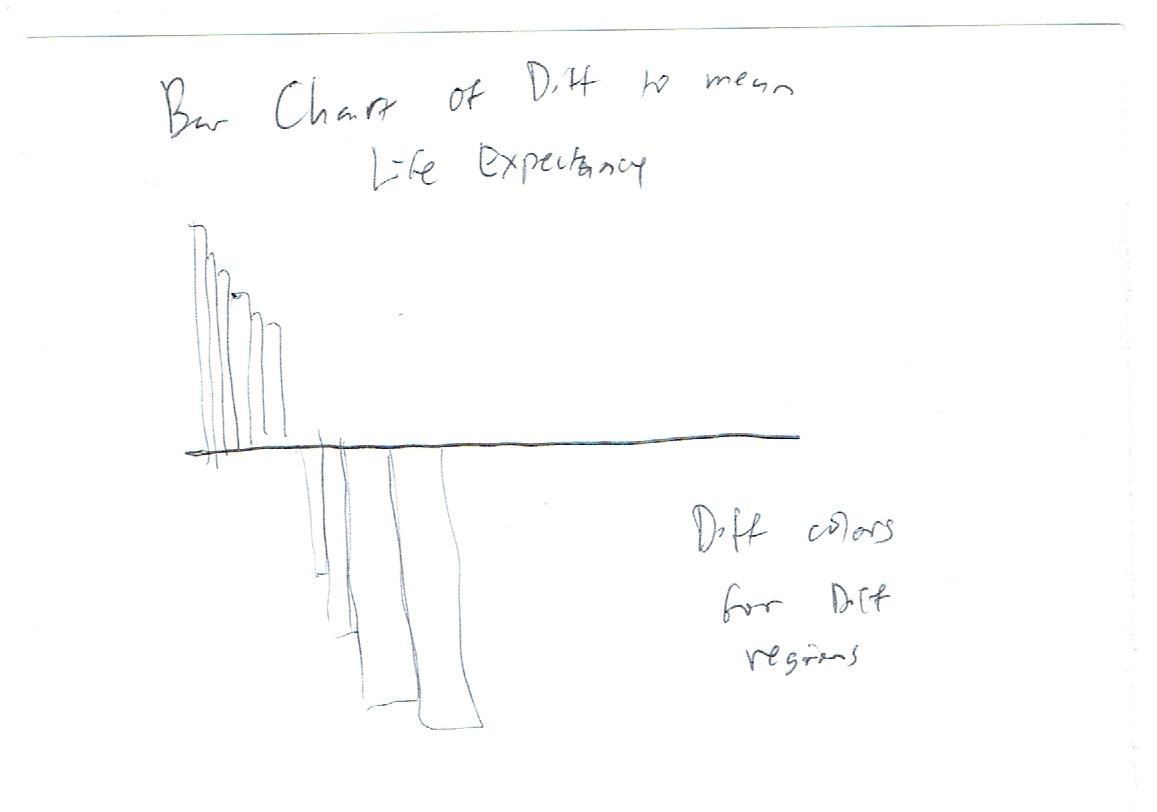

Barchart showing life expectancy by region

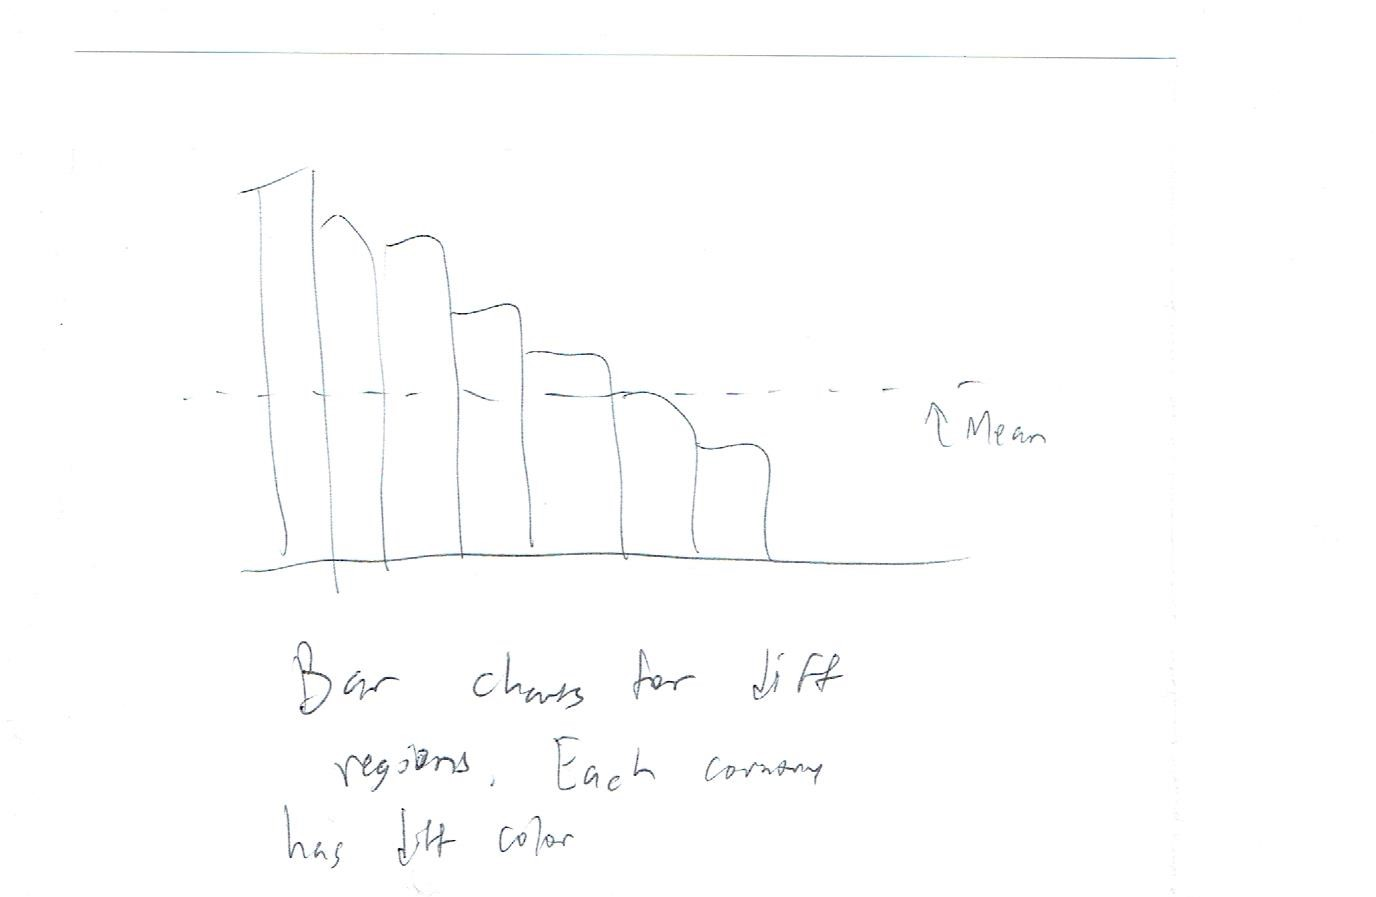

Scatterplot showing correlation of life expectancy to corruption

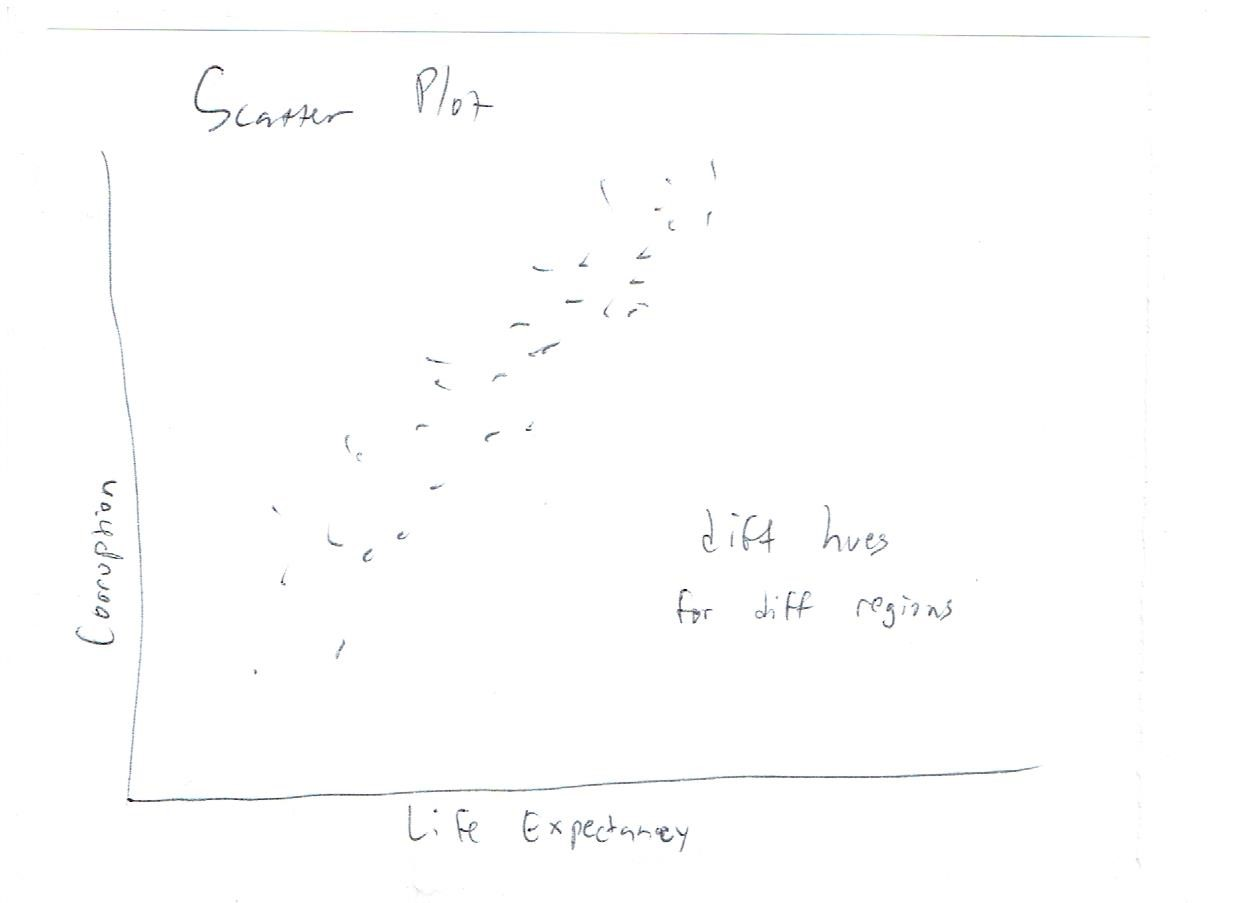

Barchart showing life expectancy changes over time

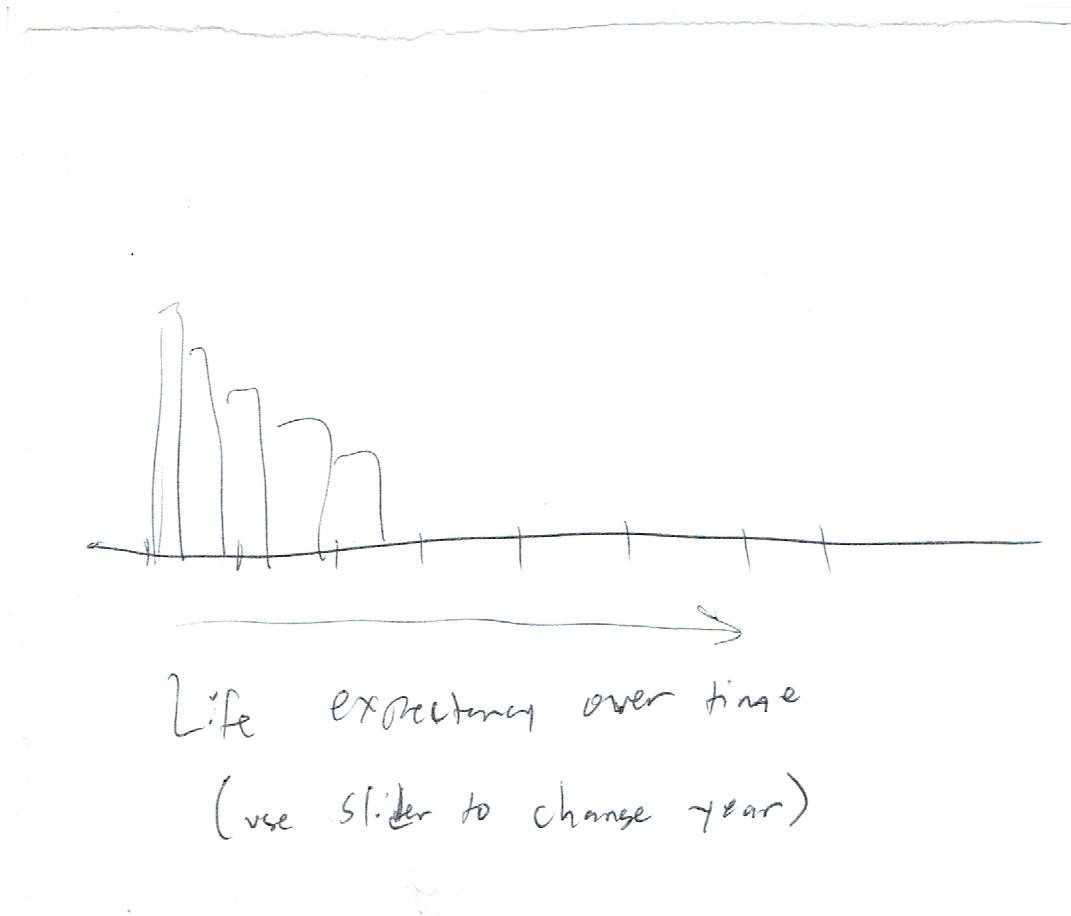

Barchart showing life expectancy versus the mean. Each region is a different color.   Hovering over countries shows the country name, mean life expectancy for all, and the individual countries life expectancy.  It made more sense to turn this into a horizontal barchart instead of vertical in order to see all of the countries at the same time.

In [290]:
data['MeanDiff'] = data['2020']-np.mean(data['2020'])
data['MeanALL_2020'] = np.mean(data['2020'])

alt.Chart(data,title="Life Expectancy Vs Mean").mark_bar().encode(
    y=alt.Y("Country Name:N", sort=alt.EncodingSortField(field="MeanDiff")), x=alt.X("MeanDiff:Q"),tooltip=["Country Name:N","MeanDiff:Q","2020:Q","MeanALL_2020:Q"],color="Region"
)



alt.Chart(...)

Barchart showing life expectancy by region.  Can use dropdown menu to select a different region.  Each country is a different color.  Mean for the selected region is also displayed.   Hovering over mean line shows the mean for that region, hovering over any individual country will display the country name and its value for life expectancy.

In [291]:
input_dropdown = alt.binding_select(options=list(data['Region'].unique()), name='Region')
selector = alt.selection_single(fields=['Region'], bind=input_dropdown, init={'Region': 'South Asia'})


bar = alt.Chart(data,title="Life Expectancy By Region").mark_bar().encode(x="Country Name:N", y=alt.Y("2020:Q",title="Life Expectancy",scale=alt.Scale(domain=[50,90])),tooltip=["Country Name:N","2020:Q"],color="Country Name").add_selection(
    selector).transform_filter(
    alt.datum.Region == selector["Region"][0]
)

rule = alt.Chart(data).mark_rule(color='red').encode(y='mean(2020)',size=alt.SizeValue(3),tooltip=["mean(2020):Q"]).transform_filter(
    selector
)



(bar + rule).properties(width=600)



alt.LayerChart(...)

Scatterplot to visually check to see if any correlation appears to exist.  We could apply mathematical tests to validate any findings here as a next step in the analysis but since this course focuses on visualization techniques I do not go that far.  Hovering over the individual points will display the country name, life expectancy, and corruption level.  Each region is a different color.

In [292]:
alt.Chart(data, title="Scatterplot of Life Expectancy vs Corruption").mark_circle().encode(
    x = alt.X("2020:Q",title="Life Expectancy",scale=alt.Scale(domain=[50, 90])),
    y = alt.Y("CPI:Q",title="Corruption Index"),
    color="Region",
    tooltip=["Country Name", "2020","CPI"]
).properties(width=600)

alt.Chart(...)

Using a slider to see how life expectancy has changed over time.  Had to do some data manipulations to get the different years into the same columns (and make them numerical) in order for altair to use a slider for selection. Hovering over the individual points will display the country name and life expectancy for the selected year.  Each region is a different color.

In [293]:
#combining all years into a single column
data_subset = data[['Country Name','Region','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']]
data_subset = pd.melt(data_subset,id_vars=['Country Name','Region'],var_name='Year')
data_subset = data_subset.astype({'Year':'int'})

data_subset



,Country Name,Region,Year,value
0,Afghanistan,South Asia,2011,61.419
1,Angola,Sub-Saharan Africa,2011,57.596
2,Albania,Europe & Central Asia,2011,78.092
3,United Arab Emirates,Middle East & North Africa,2011,78.517
4,Argentina,Latin America & Caribbean,2011,76.124
...,...,...,...,...
1555,Vietnam,East Asia & Pacific,2020,75.378
1556,Vanuatu,East Asia & Pacific,2020,70.299
1557,South Africa,Sub-Saharan Africa,2020,65.252
1558,Zambia,Sub-Saharan Africa,2020,62.380


In [294]:
slider = alt.binding_range(min=2011, max=2020, step=1, name='Year')
select_year = alt.selection_single(name="Year", fields=['Year'],
                                   bind=slider, init={'Year': 2011})

bar = alt.Chart(data_subset,title="Life Expectancy Over Time").mark_bar().encode(
    x=alt.X("Country Name:N", sort=alt.EncodingSortField(field="value")), y=alt.Y("value:Q"),tooltip=["Country Name:N","value:Q"],color="Region"
    ).add_selection(select_year).transform_filter(select_year
)

rule = alt.Chart(data_subset).mark_rule(color='red').encode(y='mean(value)',size=alt.SizeValue(3),tooltip=["mean(value):Q"]).transform_filter(
    select_year
)

(bar + rule)

alt.LayerChart(...)

### Key Elements and Discussion

The key elements of my design are the ability to drill down by region and/or year to see how life expectancy varies by location and how it has changed over time.  Giving us two "axes" to look at gives a better picture of the data from various viewpoints.  Also, by assigning colors to regions as opposed to individual countries, one can quickly observe a key element of what we are trying to understand from the data (if different regions of the world have different life expectancies).  

### Final Evaluation Approach

The target questions I would want to answer are if life expectancies vary by region by more than just chance (i.e. is the different statistically significant) as well as if there is any (statistically significant) correlation between corruption and life expectancy.  To answer these questions, I would use formal experiments such as mathematical tests as well as visualization of the data to see if there are any other questions that need to be answered, any outliers that may lead to inaccurate results, etc.  To instantiate these methods I used dropdown menus as well as sliding toolbars.  I think these are intuitive actions that users will be familiar with and can easily navigate.

I had a couple colleagues take a look at this visulaization and agreed that it was informative and clearly showed what I was attempting to learn about the data.  The primary feedback from the both of them was that it could have been a bit more eye-catching with better/more sophisticated visualizations in order to draw the audience in.  One of them remarked bar charts and scatter plots are too "generic".

### Synthesis of Findings

We find that life expectancy does vary quite significantly based on region, which isnt terribly surprising.  Also, the thesis that higher corruption is correlated with lower life expectancy does appear to be true, though this doesnt prove any causation or if it is even mathematically significant, but being able to visualize this from the data was the goal of the project and I believe that was accomplished.  I think the dropdown menu for the different regions worked well as it allowed for us to see which countries within a region might be driving up or down the life expectancy for that group.  It was interesting to see that some very small, wealthy countries in certain regions were driving up the average of life expectancy for that region.  It would probably make more sense to use some sort of a per capita adjusted life expectancy measure for each region to correct for this.